In [2]:
import os
import matplotlib.pyplot as plt

In [20]:
data_dir = '/Users/vincentiusverel/Vincent/TugasAkhir/TA_EmotionDetection/dataset/augmented/train'

In [21]:
labels = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

In [22]:
emotion_counts = {label: 0 for label in labels}

for label in labels:
    label_dir = os.path.join(data_dir, label)
    num_images = len(os.listdir(label_dir))
    emotion_counts[label] = num_images

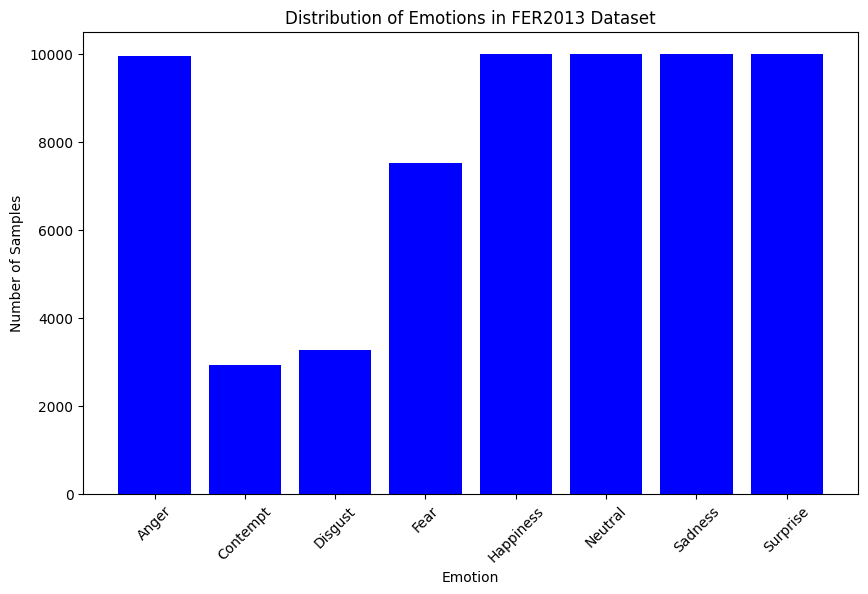

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(emotion_counts.keys(), emotion_counts.values(), color='blue')
plt.title('Distribution of Emotions in FER2013 Dataset')
plt.xlabel('Emotion')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()